In [208]:
# The objective is to make the equation equivalent to Propertycrime=α+Population+Population2+Murder+Robbery

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:3f}'.format

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

# Bring in data
df = pd.read_csv("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv")
# Pick the fourth row as the header
df.columns = df.iloc[3]
# Rename column headers to make it easier to work with
df.columns = ['city', 'population', 'violent', 'murder', 'r_1', 'r_2', 'robbery', 'assault', 'property', 'burglary', 'larceny', 'motor', 'arson', 'empty']
# Remove the any lines that are empty in Population column.
df.dropna(subset=['population'], inplace=True)
# Remove another line filled with wrong data
df.drop(df.index[0], inplace=True)

In [209]:
# Remove columns that will not be added to the equation.
df = df.drop(columns=['city', 'violent', 'r_1', 'r_2', 'property', 'burglary', 'larceny', 'motor', 'arson', 'empty'])

# Make definition to remove commas from strings
def replace(column):
    df[column] = df[column].str.replace(',', '')
    
replace('population')
replace('murder')
replace('robbery')
replace('assault')

# Convert type to integers
print(df.head())

  population murder robbery assault
4       1861      0       0       0
5       2577      0       0       3
6       2846      0       0       3
7      97956      8     227     526
8       6388      0       4      16


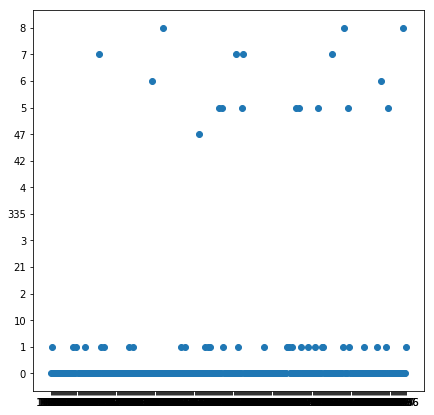

In [210]:
# Change variables so any values greater than 0 is coded as 1
# And any values equal to 0 are coded as 0.
# first check for anamolies
plt.figure(figsize=(7, 7))
plt.scatter(x=df['population'], y=df['murder'])
plt.show()

In [211]:
# Convert to integer
df.population = df.population.astype(int)
df.murder = df.murder.astype(int)
df.robbery = df.robbery.astype(int)
df.assault = df.assault.astype(int)
df

print(df[:10])

    population  murder  robbery  assault
4         1861       0        0        0
5         2577       0        0        3
6         2846       0        0        3
7        97956       8      227      526
8         6388       0        4       16
9         4089       0        3        2
10        1781       0        0        3
11      118296       1       31       68
12        9519       0        4        3
13       18182       0       12       18


In [214]:
# Change variables so any values greater than 0 is coded as 1
# And any values equal to 0 are coded as 0.
#print(df.loc[df['murder'] > 0])
#df['robbery'].replace(to_replace=df.loc[df['robbery'] > 0], value='1', inplace=True)
#df['robbery'] = df['robbery'].map({227: 1, 0: 0})
df['murder'][df['murder'] > 0] = 1
df['robbery'][df['robbery'] > 0] = 1
df['assault'][df['assault'] > 0] = 1
df

,population,murder,robbery,assault
4,1861,0,0,0
5,2577,0,0,1
6,2846,0,0,1
7,97956,1,1,1
8,6388,0,1,1
9,4089,0,1,1
10,1781,0,0,1
11,118296,1,1,1
12,9519,0,1,1
13,18182,0,1,1


In [ ]:
# Change variables so any values greater than 0 is coded as 1
# And any values equal to 0 are coded as 0.
murderList = []
robberyList = []
assaultList = []

for i in df.index:
    number = int(df.iloc[i][1])
    if number > 0:
        murderList.append(1)
    else:
        murderList.append(0)

print(murderList)